<a href="https://colab.research.google.com/github/KR-JuYong/KR-JuYong-POS_NEG_Sentiment_Analysis/blob/main/%EA%B8%B0%EA%B3%84%ED%95%99%EC%8A%B5_(%EA%B0%90%EC%84%B1_%EB%B6%84%EC%84%9D)_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_%EA%B0%9C%EB%B0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## colab 환경에서 한글 폰트 설정 123
!apt-get update -qq
!apt-get install fonts-nanum* -qq
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm -rf ~/.cache/matplotlib

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 31 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 4 dirs
/usr/share/fonts/truetype/dejavu: caching, new cache contents: 22 fonts, 0 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 31 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/dejavu: skipping, looped directory detected
/usr/share/fonts/truetype

In [ ]:
## colab 환경에서 konlpy 설정

%%bash
apt-get update
apt-get install g++ openjdk-8-jdk python-dev python3-dev
pip3 install JPype1
pip3 install konlpy #한국어 처리 패키지 ( 형태소 분리 )


Hit:1 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Hit:3 http://security.ubuntu.com/ubuntu focal-security InRelease
Hit:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Hit:5 http://archive.ubuntu.com/ubuntu focal InRelease
Hit:6 http://archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:7 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:8 http://archive.ubuntu.com/ubuntu focal-backports InRelease
Hit:9 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Hit:10 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Hit:11 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal InRelease
Reading package lists...
Reading package lists...
Building dependency tree...
Reading state information...
g++ is already the newest version (4:9.3.0-1ubuntu2).
python3-dev is already the newest version (3.8.2-0ubuntu2).
python-d

In [ ]:
%env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64"

env: JAVA_HOME="/usr/lib/jvm/java-8-openjdk-amd64"


# 프로젝트(감성 분류 모델 만들기 w/ 리뷰 데이터)

In [ ]:
import pandas as pd

train_df = pd.read_csv('ratings_train.txt', encoding='utf-8', sep='\t', engine='python')
train_df

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
...,...,...,...
149995,6222902,인간이 문제지.. 소는 뭔죄인가..,0
149996,8549745,평점이 너무 낮아서...,1
149997,9311800,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,0
149998,2376369,청춘 영화의 최고봉.방황과 우울했던 날들의 자화상,1


In [ ]:
train_df = train_df[train_df['document'].notnull()]
train_df = train_df[train_df['label'].notnull()]

In [ ]:
import re # 정규표현식을 사용 할 때 사용 're'

train_df['document'] = train_df['document'].apply(lambda x : re.sub(r'[^ ㄱ-ㅣ가-힣]+', " ", x))
train_df.head()

,id,document,label
0,9976970,아 더빙 진짜 짜증나네요 목소리,0
1,3819312,흠 포스터보고 초딩영화줄 오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 솔직히 재미는 없다 평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화 스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [ ]:
test_df = pd.read_csv('ratings_test.txt', encoding='utf8', sep='\t', engine='python')
test_df

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0
...,...,...,...
49995,4608761,오랜만에 평점 로긴했네ㅋㅋ 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함,1
49996,5308387,의지 박약들이나 하는거다 탈영은 일단 주인공 김대희 닮았고 이등병 찐따 OOOO,0
49997,9072549,그림도 좋고 완성도도 높았지만... 보는 내내 불안하게 만든다,0
49998,5802125,절대 봐서는 안 될 영화.. 재미도 없고 기분만 잡치고.. 한 세트장에서 다 해먹네,0


In [ ]:
test_df = test_df[test_df['document'].notnull()]
test_df = test_df[test_df['label'].notnull()]

In [ ]:
test_df['document'] = test_df['document'].apply(lambda x : re.sub(r'[^ ㄱ-ㅣ가-힣]+', "", x))

In [ ]:
#훈련 데이터
from konlpy.tag import Okt #형태소 분석
okt = Okt()

def okt_tokenizer(text):
    tokens = okt.morphs(text)
    return tokens


from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(tokenizer = okt_tokenizer, ngram_range=(1,3), min_df=2, max_df=0.9)
tfidf.fit(train_df['document'])
train_tfidf = tfidf.transform(train_df['document'])


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
SA_lr = LogisticRegression(random_state = 0)

In [ ]:
SA_lr.fit(train_tfidf, train_df['label'])

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {'C': [1, 3, 3.5, 4, 4.5, 5]}
SA_lr_grid_cv = GridSearchCV(SA_lr, param_grid=params, cv=3, scoring='accuracy', verbose=1)

In [ ]:
SA_lr_grid_cv.fit(train_tfidf, train_df['label'])

Fitting 3 folds for each of 6 candidates, totalling 18 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(cv=3, estimator=LogisticRegression(random_state=0),
             param_grid={'C': [1, 3, 3.5, 4, 4.5, 5]}, scoring='accuracy',
             verbose=1)

In [ ]:
print(SA_lr_grid_cv.best_params_, round(SA_lr_grid_cv.best_score_, 4))

{'C': 3.5} 0.8558


In [ ]:
SA_lr_best = SA_lr_grid_cv.best_estimator_

In [ ]:
test_tfidf = tfidf.transform(test_df['document'])

In [ ]:
test_predict = SA_lr_best.predict(test_tfidf)

In [ ]:
#테스트 데이터 감정 분류
from sklearn.metrics import accuracy_score

print('테스트 감정 분류 정확도 : ', round(accuracy_score(test_df['label'], test_predict), 3))

테스트 감정 분류 정확도 :  0.859



# 생성된 모델로 예측 수행


In [ ]:
# 새로운 텍스트를 직접 입력해 감성 예측 수행해봅시다!
st = input("감성을 분석할 문장을 입력하세요: ")

감성을 분석할 문장을 입력하세요: 보드라운 손길이 쓰다듬고 응축된 눈물이 대지를 적셔야만 새순이 솟아나온다


In [ ]:
st = re.compile(r'[ㄱ-ㅣ가-힣]+').findall(st)
print(st)

st = [" ".join(st)]
print(st)

['보드라운', '손길이', '쓰다듬고', '응축된', '눈물이', '대지를', '적셔야만', '새순이', '솟아나온다']
['보드라운 손길이 쓰다듬고 응축된 눈물이 대지를 적셔야만 새순이 솟아나온다']


In [ ]:
# 입력 텍스트의 벡터화
st_tfidf = tfidf.transform(st)

# 감성 분석 모델에 적용하여 예측
st_predict = SA_lr_best.predict(st_tfidf)

In [ ]:
# 예측값 출력
if(st_predict ==0):
    print(st, "->> 부정 감성")
else:
    print(st, "->> 긍정 감성")

['보드라운 손길이 쓰다듬고 응축된 눈물이 대지를 적셔야만 새순이 솟아나온다'] ->> 긍정 감성


# 네이버 뉴스 데이터 가져오기

In [ ]:
import os
import sys
import urllib.request
import datetime
import time
import json

# 각자가 발급받은 Naver API 정보를 입력합니다
client_id = 'Pqc2BDcBjMjxA3TN32zl'
client_secret = 'uP5BnNc_he'

#[CODE 1]
def getRequestUrl(url):
    req = urllib.request.Request(url)
    req.add_header("X-Naver-Client-Id", client_id)
    req.add_header("X-Naver-Client-Secret", client_secret)

    try:
        response = urllib.request.urlopen(req)
        if response.getcode() == 200:
            print ("[%s] Url Request Success" % datetime.datetime.now())
            return response.read().decode('utf-8')
    except Exception as e:
        print(e)
        print("[%s] Error for URL : %s" % (datetime.datetime.now(), url))
        return None

#[CODE 2]
def getNaverSearch(node, srcText, start, display):
    base = "https://openapi.naver.com/v1/search"
    node = "/%s.json" % node
    parameters = "?query=%s&start=%s&display=%s" % (urllib.parse.quote(srcText), start, display)

    url = base + node + parameters
    responseDecode = getRequestUrl(url)   #[CODE 1]

    if (responseDecode == None):
        return None
    else:
        return json.loads(responseDecode)

#[CODE 3]
def getPostData(post, jsonResult, cnt):
    title = post['title']
    description = post['description']
    org_link = post['originallink']
    link = post['link']

    pDate = datetime.datetime.strptime(post['pubDate'],  '%a, %d %b %Y %H:%M:%S +0900')
    pDate = pDate.strftime('%Y-%m-%d %H:%M:%S')

    jsonResult.append({'cnt':cnt, 'title':title, 'description': description,
'org_link':org_link,   'link': org_link,   'pDate':pDate})
    return

#[CODE 0]
def main():
    node = 'news'   # 크롤링 할 대상
    srcText = input('검색어를 입력하세요: ')
    cnt = 0
    jsonResult = []

    jsonResponse = getNaverSearch(node, srcText, 1, 100)  #[CODE 2]
    total = jsonResponse['total']

    while ((jsonResponse != None) and (jsonResponse['display'] != 0)):
        for post in jsonResponse['items']:
            cnt += 1
            getPostData(post, jsonResult, cnt)  #[CODE 3]

        start = jsonResponse['start'] + jsonResponse['display']
        jsonResponse = getNaverSearch(node, srcText, start, 100)  #[CODE 2]

    print('전체 검색 : %d 건' %total)

    with open('%s_naver_%s.json' % (srcText, node), 'w', encoding='utf8') as outfile:
        jsonFile = json.dumps(jsonResult,  indent=4, sort_keys=True,  ensure_ascii=False)

        outfile.write(jsonFile)

    print("가져온 데이터 : %d 건" %(cnt))
    print ('%s_naver_%s.json SAVED' % (srcText, node))

if __name__ == '__main__':
    main()


검색어를 입력하세요: 북한 우주발사체
[2023-07-03 01:23:36.505110] Url Request Success
[2023-07-03 01:23:36.950474] Url Request Success
[2023-07-03 01:23:37.379030] Url Request Success
[2023-07-03 01:23:37.850732] Url Request Success
[2023-07-03 01:23:38.317232] Url Request Success
[2023-07-03 01:23:38.798231] Url Request Success
[2023-07-03 01:23:39.245540] Url Request Success
[2023-07-03 01:23:39.687346] Url Request Success
[2023-07-03 01:23:40.155939] Url Request Success
[2023-07-03 01:23:40.695853] Url Request Success
HTTP Error 400: Bad Request
[2023-07-03 01:23:41.016406] Error for URL : https://openapi.naver.com/v1/search/news.json?query=%EB%B6%81%ED%95%9C%20%EC%9A%B0%EC%A3%BC%EB%B0%9C%EC%82%AC%EC%B2%B4&start=1001&display=100
전체 검색 : 10994 건
가져온 데이터 : 1000 건
북한 우주발사체_naver_news.json SAVED


In [ ]:
import json
file_name = '북한 우주발사체_naver_news.json'

with open(file_name, encoding='utf8') as j_f:
    data = json.load(j_f)

In [ ]:
data_title =[]
data_description = []

for item in data:
    data_title.append(item['title'])
    data_description.append(item['description'])

data_df = pd.DataFrame({'title':data_title, 'description':data_description})

data_df['title'] = data_df['title'].apply(lambda x : re.sub(r'[^ ㄱ-ㅣ가-힣]+', " ", x))
data_df['description'] = data_df['description'].apply(lambda x : re.sub(r'[^ ㄱ-ㅣ가-힣]+', " ", x))

data_df.head()

,title,description
0,데일리 오발령 문자 원인은 기술일까 정책일까,알고 보니 월 일 오전 시 분 북한 의 우주발사체 발사에 따라 서울시에 울...
1,일요와이드 북 월 정세 전망 일 열병식 전후 위성 재발사 할까,질문 최근 군이 북한 의 우주발사체 잔해를 추가 인양했습니다 구체적으로...
2,한반도 브리핑 대규모 열병식 준비 위성실패 만회 목적,지난달 말 발사 과정에서 추락했던 북한 우주발사체 의 추가 잔해가 인양됐습니다 ...
3,북한 원자탄 수소탄 위성까지 양탄일성 보유한다면,제대로 된 정찰위성의 발사에는 북한 이 이미 상당한 수준으로 보유하고 있는 아이시...
4,외무성 현정은 방북 추진에 검토해볼 의향도 없어 거부 담화,한편 북한 은 최근 해금강호텔 등 금강산의 현대아산 시설을 무단 철거하고 북한...


In [ ]:
# title 부분에 대한 데이터의 피처 벡터화를 통한 감성 분석
data_title_tfidf = tfidf.transform(data_df['title'])
data_title_predict = SA_lr_best.predict(data_title_tfidf)
data_df['title_label'] = data_title_predict

In [ ]:
# description 부분에 대한 데이터의 피처 벡터화를 통한 감성 분석
data_description_tfidf = tfidf.transform(data_df['description'])
data_description_predict = SA_lr_best.predict(data_description_tfidf)
data_df['description_label'] = data_description_predict

In [ ]:
# csv 파일로 저장 ---------------------------------------------
data_df.to_csv(file_name+'.csv', encoding='euc-kr')

In [ ]:
columns_name = ['title','title_label','description','description_label']
NEG_data_df = pd.DataFrame(columns=columns_name)
POS_data_df = pd.DataFrame(columns=columns_name)

for i, data in data_df.iterrows():
    title = data["title"]
    description = data["description"]
    t_label = data["title_label"]
    d_label = data["description_label"]

    if d_label == 0: # 부정 감성 샘플만 추출
        NEG_data_df = NEG_data_df.append(pd.DataFrame([[title, t_label, description, d_label]],columns=columns_name),ignore_index=True)
    else : # 긍정 감성 샘플만 추출
        POS_data_df = POS_data_df.append(pd.DataFrame([[title, t_label, description, d_label]],columns=columns_name),ignore_index=True)

# 파일에 저장.
NEG_data_df.to_csv(file_name+'_NES.csv', encoding='euc-kr')
POS_data_df.to_csv(file_name+'_POS.csv', encoding='euc-kr')

<ipython-input-36-ea80507b34b8>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  POS_data_df = POS_data_df.append(pd.DataFrame([[title, t_label, description, d_label]],columns=columns_name),ignore_index=True)
<ipython-input-36-ea80507b34b8>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  POS_data_df = POS_data_df.append(pd.DataFrame([[title, t_label, description, d_label]],columns=columns_name),ignore_index=True)
<ipython-input-36-ea80507b34b8>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  POS_data_df = POS_data_df.append(pd.DataFrame([[title, t_label, description, d_label]],columns=columns_name),ignore_index=True)
<ipython-input-36-ea80507b34b8>:12: FutureWarning: The frame.append method is deprecated and will be re

In [ ]:
"긍정감성:",len(POS_data_df), "부정감성:",len(NEG_data_df)

('긍정감성:', 233, '부정감성:', 767)

In [ ]:
POS_description = POS_data_df['description']

In [ ]:
POS_description_noun_tk = []

for d in POS_description:
    POS_description_noun_tk.append(okt.nouns(d)) #형태소가 명사인 것만 추출

In [ ]:
print(POS_description_noun_tk)

[['알', '월', '일', '오전', '시', '분', '북한', '의', '우주발사체', '발사', '서울시', '대피', '경계', '경보', '문자', '시민', '단잠', '거', '날', '보', '문자', '계기', '서울시', '행정안전부', '문자', '메시지', '책임', '소재'], ['질문', '최근', '군', '북한', '의', '우주발사체', '잔해', '추가', '인양', '구체', '무엇', '확인', '만리', '경', '호', '보도', '대해', '군', '당국', '사실', '입장', '극도', '보안', '조처'], ['지난달', '말', '발사', '과정', '추락', '북한', '우주발사체', '의', '추가', '잔해', '인양', '일각', '이', '물체', '발사체', '탑재', '군사', '정찰위성', '일', '수', '관측', '북한', '이', '지구관', '위성', '온', '광명성'], ['한편', '군', '일', '서해', '인양', '북한', '우주발사체', '동체', '내부', '백두산', '계열', '엔진', '주요', '성품', '터보펌프', '로', '추정', '물체', '발견', '미군', '정밀', '분석', '것', '북한', '의', '대륙간탄도미사일'], ['대표', '해킹', '집단', '년', '전', '방위', '사이버', '공격', '해킹', '통해', '무기', '개발', '및', '인공위성', '우주', '관련', '첨단', '기술', '절취', '북한', '의', '우주발사체', '개발', '직', '간접', '관여', '것', '정부', '설명'], ['한편', '군', '인양', '북한', '우주발사체', '동체', '내부', '백두산', '계열', '엔진', '터보', '펌프', '추정', '물체', '발견', '미군', '정밀', '분석', '것', '러시', '아산', '추정', '부품', '잔해', '발견', '것'], ['차', '우주발사체', '발사'

In [ ]:
POS_description_noun_join = []

for d in POS_description_noun_tk:
    d2 = [w for w in d if len(w) > 1] #길이가 1인 토큰 제외
    POS_description_noun_join.append(" ".join(d2)) # 토큰을 연결(join)하여 리스트 구성

In [ ]:
print(POS_description_noun_join)


['오전 북한 우주발사체 발사 서울시 대피 경계 경보 문자 시민 단잠 문자 계기 서울시 행정안전부 문자 메시지 책임 소재', '질문 최근 북한 우주발사체 잔해 추가 인양 구체 무엇 확인 만리 보도 대해 당국 사실 입장 극도 보안 조처', '지난달 발사 과정 추락 북한 우주발사체 추가 잔해 인양 일각 물체 발사체 탑재 군사 정찰위성 관측 북한 지구관 위성 광명성', '한편 서해 인양 북한 우주발사체 동체 내부 백두산 계열 엔진 주요 성품 터보펌프 추정 물체 발견 미군 정밀 분석 북한 대륙간탄도미사일', '대표 해킹 집단 방위 사이버 공격 해킹 통해 무기 개발 인공위성 우주 관련 첨단 기술 절취 북한 우주발사체 개발 간접 관여 정부 설명', '한편 인양 북한 우주발사체 동체 내부 백두산 계열 엔진 터보 펌프 추정 물체 발견 미군 정밀 분석 러시 아산 추정 부품 잔해 발견', '우주발사체 발사 초대형 핵탄두 동원 핵실험 미국 관심 유도 도발 시도 예상 북한 우크라이나 전쟁 중국 패권 갈등 미국 시선', '합동 참모 본부 매체 보도 북한 주장 우주발사체 만리 추정 물체 인양 내용 사실 우리 관련 작전 활동 지속 지금', '단행 예고 실행 상태 이성준 합참 공보실 브리핑 북한 주장 우주 발사체 추가 발사 포함 도발 형태 대해 예의 주시', '당국 북한 주장 우주발사체 만리 추정 물체 인양 내용 사실 우리 관련 작전 활동 지속 설명 앞서 일부 매체 지난주 북한 정찰위성 추정', '당국 지난달 해상 추락 북한 우주발사체 잔해 추가 인양 우주발사체 탑재 군사 정찰위성 만리 해일 가능성 대해 사실 부정', '합동 참모 본부 관계자 매체 보도 북한 주장 우주발사체 만리 추정 물체 인양 내용 사실 우리 관련 작전 활동 지속 앞서 정부', '북한 우주발사체 지난달 서해 상공 중도 추락 여개 조각 해상 낙하 노컷뉴스 여러분 제보 세상 각종 비리 부당 대우 사건 사고 미담', '관계자 매체 보도 북한 주장 우주발사체 만리 추정 물체 인양 내용 사실 우리 관련 작전 활동 지속 우리 당국

In [ ]:
NEG_description = NEG_data_df['description']

In [ ]:
NEG_description_noun_tk = []

for d in NEG_description:
    NEG_description_noun_tk.append(okt.nouns(d)) #형태소가 명사인 것만 추출


In [ ]:
print(NEG_description_noun_tk)

[['제대로', '정찰위성', '발사', '북한', '이', '수준', '보유', '아이', '시비', '엠', '과거', '우주발사체', '더', '수준', '기술', '정찰위성', '지구', '고도', '저궤도'], ['한편', '북한', '은', '최근', '해금강', '호텔', '등', '금강산', '현대', '아산', '시설', '무단', '철거', '북한', '주장', '우주발사체', '실패', '절치', '부심', '가운데', '외교관', '이탈', '식량난', '겹', '월', '일', '북한', '전승', '절', '계기', '대적', '열병', '준비'], ['정종', '구', '화', '참모', '처', '월', '일', '이지스', '구축함', '공군', '레이더', '등', '북한', '주장', '우주발사체', '를', '정상', '포착', '추적', '여', '개', '다수', '잔해', '물', '확인', '위성', '발사', '한참', '전', '북한', '동창', '리', '예의'], ['북한', '은', '지난', '월', '일', '우주', '발사체', '천리마', '호', '군사', '정찰위성', '만리', '경', '호', '를', '실어', '발사', '발사체', '의', '오류로', '이후', '북한', '은', '김정은', '총비서', '참석', '노동당', '중앙', '위원회', '기', '차', '회의'], ['월', '일', '북한', '이', '우주발사체', '천리마', '호', '엔진', '고장', '발사', '몇', '분만', '서해', '추락', '소리', '김', '위원장', '인민', '면목', '한국', '정부', '국책'], ['김정은', '경제', '경제', '핵', '무력', '병진', '노선', '가동', '지난', '월', '말', '우주발사체', '시도', '김정은', '입지', '더', '궁지', '상태', '그', '진단', '최근', '북한', '보이'], ['일', '군', '관계자

In [ ]:
NEG_description_noun_join = []

for d in NEG_description_noun_tk:
    d2 = [w for w in d if len(w) > 1]  #길이가 1인 토큰은 제외
    NEG_description_noun_join.append(" ".join(d2)) # 토큰을 연결(join)하여 리스트 구성


In [ ]:
print(NEG_description_noun_join)

['제대로 정찰위성 발사 북한 수준 보유 아이 시비 과거 우주발사체 수준 기술 정찰위성 지구 고도 저궤도', '한편 북한 최근 해금강 호텔 금강산 현대 아산 시설 무단 철거 북한 주장 우주발사체 실패 절치 부심 가운데 외교관 이탈 식량난 북한 전승 계기 대적 열병 준비', '정종 참모 이지스 구축함 공군 레이더 북한 주장 우주발사체 정상 포착 추적 다수 잔해 확인 위성 발사 한참 북한 동창 예의', '북한 지난 우주 발사체 천리마 군사 정찰위성 만리 실어 발사 발사체 오류로 이후 북한 김정은 총비서 참석 노동당 중앙 위원회 회의', '북한 우주발사체 천리마 엔진 고장 발사 분만 서해 추락 소리 위원장 인민 면목 한국 정부 국책', '김정은 경제 경제 무력 병진 노선 가동 지난 우주발사체 시도 김정은 입지 궁지 상태 진단 최근 북한 보이', '관계자 북한 지난달 정찰위성 만리 탑재 우주 발사체 천리마 발사 동해 단거리 탄도미사일 발사 제외 군사', '북한 우주발사체 발사 아침 경계 보가 발령 시민 혼란 지난달 오전 지역 경계 경보 발령 국민 여러분 대피 준비 어린이 노약 우선', '지난 합동 참모 본부 해군 최근 서해 북한 우주발사체 관련 잔해 추가 인양 해당 물체 천리마 만리 호의 가능성 제기 수습 만리', '북한 위성 우주 발사체 또한 탄도미사일 기술 사용 때문 위성 발사 시도 또한 북한 탄도미사일 기술 이용 모든 비행 발사 금지 유엔 안전보장 이사회 결의 위반 해당', '그린 수소 에너지 우주발사체 테마 파크 국립 심뇌 혈관 연구소 핵심 신규 사업 추진 공군 북한 특수작전 비행기 비행 감지 위해 해상 풍력 발전 시설 높이 제한', '그린 수소 에너지 우주발사체 테마 파크 국립 심뇌 혈관 연구소 핵심 신규 사업 추진 공군 북한 특수작전 비행기 비행 감지 위해 해상 풍력 발전 시설 높이 제한', '지난 정상회담 직후 협의 그룹 창설 골자 워싱턴 선언 발표 환영 성명 북한 위성 운반 로켓 발사 자유 연맹 회원 명의 북한 우주발사체', '지난달 북한 우주발사체 추

In [ ]:
POS_tfidf = TfidfVectorizer(tokenizer = okt_tokenizer, min_df=2 )
POS_dtm = POS_tfidf.fit_transform(POS_description_noun_join)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
#POS_vocab = dict()

#for idx, word in enumerate(POS_tfidf.get_feature_names()):
#   POS_vocab[word] = POS_dtm.getcol(idx).sum()

#POS_words = sorted(POS_vocab.items(), key=lambda x: x[1], reverse=True)

In [ ]:
POS_vocab = dict()

feature_names = POS_tfidf.vocabulary_
for word, idx in feature_names.items():
    POS_vocab[word] = POS_dtm.getcol(idx).sum()
POS_words = sorted(POS_vocab.items(), key=lambda x: x[1], reverse=True)

In [ ]:
NEG_tfidf = TfidfVectorizer(tokenizer = okt_tokenizer, min_df=2 )
NEG_dtm = NEG_tfidf.fit_transform(NEG_description_noun_join)

In [ ]:
#NEG_vocab = dict()

#for idx, word in enumerate(NEG_tfidf.get_feature_names()):
#    NEG_vocab[word] = NEG_dtm.getcol(idx).sum()

#NEG_words = sorted(NEG_vocab.items(), key=lambda x: x[1], reverse=True)

In [ ]:
NEG_vocab = dict()

feature_names = NEG_tfidf.vocabulary_
for word, idx in feature_names.items():
    NEG_vocab[word] = NEG_dtm.getcol(idx).sum()
NEG_words = sorted(NEG_vocab.items(), key=lambda x: x[1], reverse=True)

In [ ]:
POS_words

[('북한', 17.077564532472493),
 ('우주발사체', 14.139260165810223),
 ('인양', 13.826820821564365),
 ('잔해', 12.853862936150188),
 ('발사', 12.383210668115925),
 ('천리마', 11.343459990274749),
 ('발사체', 9.343761939835613),
 ('분석', 8.462413363225949),
 ('우리', 8.452265653075326),
 ('우주', 7.750873822271007),
 ('공동', 7.133557230544765),
 ('추정', 7.091668998217084),
 ('언론', 6.934162985271695),
 ('해군', 6.9121684671199075),
 ('서해', 6.634905750519458),
 ('미국', 6.433678950130814),
 ('관련', 6.412311580411004),
 ('단부', 6.285528759718014),
 ('대한', 6.09411802093278),
 ('주장', 6.0789722783506726),
 ('평택', 6.045355041998834),
 ('당국', 6.0096501258333275),
 ('탄도미사일', 5.982206586081927),
 ('해상', 5.919937241333033),
 ('사진', 5.8371711754253965),
 ('상황', 5.827106583588567),
 ('도발', 5.779059047189831),
 ('최근', 5.7595876262423085),
 ('작전', 5.635871470732267),
 ('오후', 5.61032219334354),
 ('한미', 5.565580302714155),
 ('한반도', 5.5086992209337025),
 ('지난달', 5.496123403972082),
 ('함대', 5.487640467118441),
 ('사령부', 5.444162216363232),

In [ ]:
NEG_words

[('북한', 66.32861146117568),
 ('인양', 61.1255623066493),
 ('발사', 57.34923545844955),
 ('우주발사체', 55.66812247294391),
 ('잔해', 49.88769165958765),
 ('천리마', 42.92576422131131),
 ('서해', 42.55947022638418),
 ('발사체', 37.40546464067816),
 ('지난달', 36.42524177050001),
 ('추락', 35.68996104727214),
 ('탄도미사일', 31.48699663091584),
 ('오후', 31.373240952001563),
 ('우주', 30.209487835275525),
 ('기술', 30.14937379069484),
 ('일부', 29.246618522634726),
 ('해군', 29.08757888875953),
 ('합동', 28.66507492748096),
 ('참모', 27.99767611397243),
 ('정찰위성', 27.67738037406706),
 ('본부', 27.49256883852415),
 ('우리', 27.0347396669196),
 ('이용', 25.972662314893178),
 ('공개', 25.367828680063372),
 ('함대', 25.308983779921782),
 ('사령부', 25.294263260034505),
 ('주장', 24.824969293329705),
 ('군사', 24.762851933475467),
 ('경기도', 24.307011796150793),
 ('언론', 22.035115974807862),
 ('사진', 21.99383672014965),
 ('공동', 20.98122837576166),
 ('지난', 19.592956734770155),
 ('당국', 18.8156775961319),
 ('평택', 18.41320860489177),
 ('취재', 17.458440997456595

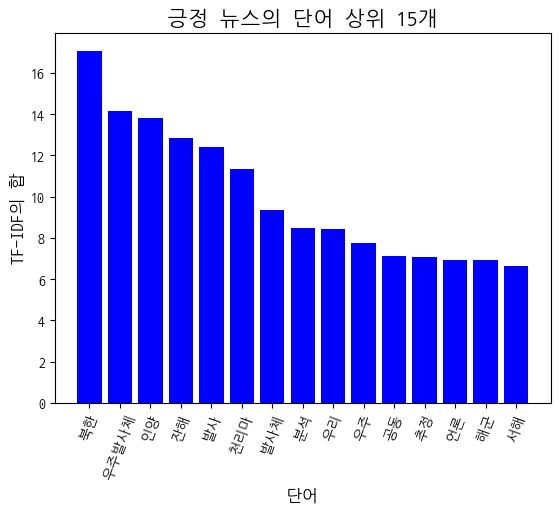

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import warnings
warnings.filterwarnings(action='ignore')

path = '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf' # 나눔 고딕
font_name = fm.FontProperties(fname=path, size=10).get_name() # 기본 폰트 사이즈 : 10
plt.rc('font', family=font_name)

max = 15  #바 차트에 나타낼 단어의 수

plt.bar(range(max), [i[1] for i in POS_words[:max]], color="blue")
plt.title("긍정 뉴스의 단어 상위 %d개" %max, fontsize=15)
plt.xlabel("단어", fontsize=12)
plt.ylabel("TF-IDF의 합", fontsize=12)
plt.xticks(range(max), [i[0] for i in POS_words[:max]], rotation=70)

plt.show()

In [ ]:
import matplotlib.font_manager as fm

font_names = [f.name for f in fm.fontManager.ttflist]
print(font_names)


['cmss10', 'STIXGeneral', 'DejaVu Sans Mono', 'DejaVu Serif', 'DejaVu Sans', 'DejaVu Serif', 'cmsy10', 'DejaVu Serif', 'STIXSizeThreeSym', 'cmtt10', 'STIXSizeTwoSym', 'DejaVu Sans Mono', 'cmb10', 'STIXNonUnicode', 'STIXNonUnicode', 'DejaVu Sans Mono', 'STIXSizeFourSym', 'STIXSizeOneSym', 'STIXGeneral', 'DejaVu Sans Display', 'DejaVu Sans', 'STIXGeneral', 'STIXGeneral', 'STIXSizeTwoSym', 'STIXNonUnicode', 'cmex10', 'STIXSizeFourSym', 'STIXNonUnicode', 'STIXSizeOneSym', 'DejaVu Serif', 'DejaVu Sans Mono', 'DejaVu Sans', 'DejaVu Sans', 'cmmi10', 'DejaVu Serif Display', 'STIXSizeFiveSym', 'cmr10', 'STIXSizeThreeSym', 'DejaVu Serif', 'NanumSquareRound', 'Liberation Mono', 'NanumBarunGothic', 'DejaVu Serif', 'DejaVu Sans', 'DejaVu Sans Mono', 'DejaVu Serif', 'Liberation Serif', 'NanumBarunGothic', 'DejaVu Serif', 'Liberation Sans Narrow', 'Liberation Sans Narrow', 'DejaVu Serif', 'Nanum Brush Script', 'DejaVu Serif', 'NanumSquare', 'DejaVu Sans', 'NanumGothic Eco', 'Liberation Sans', 'DejaVu

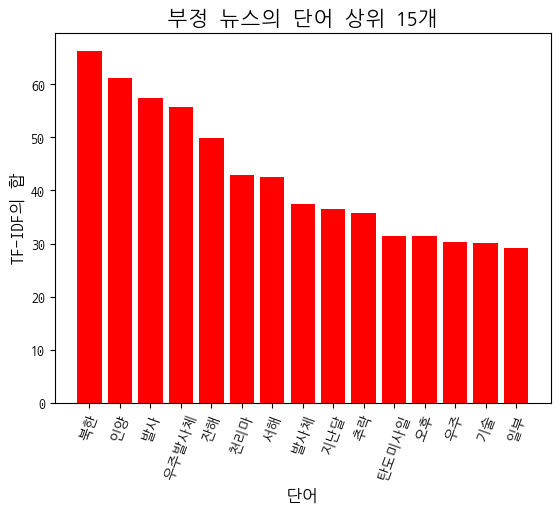

In [ ]:
plt.bar(range(max), [i[1] for i in NEG_words[:max]], color="red")
plt.title("부정 뉴스의 단어 상위 %d개" %max, fontsize=15)
plt.xlabel("단어", fontsize=12)
plt.ylabel("TF-IDF의 합", fontsize=12)
plt.xticks(range(max), [i[0] for i in NEG_words[:max]], rotation=70)

plt.show()